## The Moving Average Model

## Importing Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from math import *
sns.set()

## Loading the Data

In [2]:
raw_csv_data = pd.read_csv('Index2018.csv')
raw_csv_data

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [3]:
df_comp = raw_csv_data.copy()

## Preprocessing the Data

In [4]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True)
df_comp.set_index('date', inplace = True)
df_comp = df_comp.drop(['spx', 'dax', 'nikkei'], axis = 1)
df_comp

,ftse
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


In [5]:
df_comp['market_value'] = df_comp.ftse
del df_comp['ftse']

In [6]:
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')
df_comp

,market_value
date,
1994-01-07,3445.980000
1994-01-10,3440.580000
1994-01-11,3413.770000
1994-01-12,3372.020000
1994-01-13,3360.010000
...,...
2018-01-23,7731.827774
2018-01-24,7643.428966
2018-01-25,7615.839954


## Splitting the Data

In [7]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [8]:
df.tail()

,market_value
date,
2013-04-01,6411.74
2013-04-02,6490.66
2013-04-03,6420.28
2013-04-04,6344.11
2013-04-05,6249.77


In [9]:
df_test.head()

,market_value
date,
2013-04-08,6276.94
2013-04-09,6313.20
2013-04-10,6387.37
2013-04-11,6416.14
2013-04-12,6384.39


## LLR Test Function

In [10]:
from scipy.stats.distributions import chi2

In [11]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

## Augmented Dickey-Fuller Test

In [12]:
sts.adfuller(df.market_value)

(-1.9041551418836873,
 0.330108932770283,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### From the DF test we see that the market value prices for FTSE100 belong to a Non-Stationery Source, hence it is a better option to Extract the "Returns", check for stationarity and then work on them

## Computing and Storing Returns

In [13]:
df['returns'] = df.market_value.pct_change(1).mul(100)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ARIMA(1,1,1)

In [14]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Wed, 29 Apr 2020   AIC                          55215.333
Time:                        21:36:42   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Finding Residuals

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


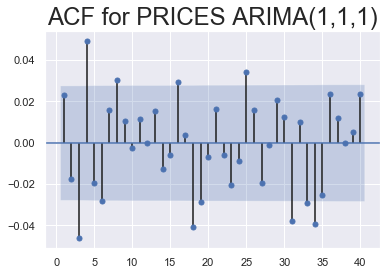

In [15]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1.iloc[1:], lags = 40, zero = False)
plt.title("ACF for PRICES ARIMA(1,1,1)", size = 24)
plt.show()

### Form the aforementioned ACF graph, we can see that the 3rd and 4th lags have values significantly different from Zero, hence we compare all the models including them from ARIMA(1,1,1) up to ARIMA(4,1,4)

## ARIMA(1,1,3)

In [16]:
model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order =(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()
results_ar_1_i_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -27590.424
Method:                       css-mle   S.D. of innovations             58.978
Date:                Wed, 29 Apr 2020   AIC                          55192.848
Time:                        21:36:44   BIC                          55231.975
Sample:                    01-10-1994   HQIC                         55206.559
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5652      0.723      0.782      0.434      -0.851       1.982
ar.L1.D.market_value    -0.3585      0.125     -2.878      0.004      -0.603      -0.114
ma.L1.D.market_value     0.3386      0.124      2.730      0.006       0.096       0.582
ma.L2.D.market_value    -0.0590      0.015     -3.932      0.000      -0.088      -0.030
ma.L3.D.market_value    -0.1002      0.015     -6.866      0.000      -0.129      -0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7897           +0.0000j            2.7897            0.5000
MA.1           -1.5201           -1.3272j            2.0180           -0.3858
MA.2           -1.5201           +1.3272j            2.0180            0.3858
MA.3            2.4511           -0.0000j            2.4511           -0.0000
-----------------------------------------------------------------------------
"""

### Comparing the LLR and AIC of ARIMA(1,1,1) and ARIMA(1,1,3)

In [17]:
print("ARIMA(1,1,1)", "\tLLR p-value = ", results_ar_1_i_1_ma_1.llf, "\tAIC = ",results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,3)", "\tLLR p-value = ", results_ar_1_i_1_ma_3.llf, "\tAIC = ",results_ar_1_i_1_ma_3.aic)

ARIMA(1,1,1) 	LLR p-value =  -27603.66641276535 	AIC =  55215.3328255307
ARIMA(1,1,3) 	LLR p-value =  -27590.424032560222 	AIC =  55192.848065120445


### Hence, we observe that our model of choice should be the ARIMA(1,1,3) model

### Plotting ACF based on ARIMA(1,1,3)

In [18]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


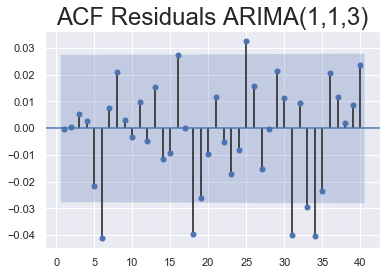

In [19]:
sgt.plot_acf(df.res_ar_1_i_1_ma_3.iloc[1:], lags = 40, zero = False)
plt.title("ACF Residuals ARIMA(1,1,3)", size = 24)
plt.show()

### The above ACF graph shows that the 6th lag is significantly different form zero and hence we should include it in oput model. 

### Therefore, after comparing all models from ARIMA(1,1,1) to ARIMA(6,1,6) we determine that the ARIMA(5,1,1) is the best model to make the predictions

## -------
## ARIMA(5,1,1)

In [20]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order = (5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags = 11)

In [21]:
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Wed, 29 Apr 2020   AIC                          55189.024
Time:                        21:36:45   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5676      0.690      0.822      0.411      -0.786       1.921
ar.L1.D.market_value     0.4011      0.159      2.529      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.164      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4213      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3735           +0.0000j            2.3735            0.0000
-----------------------------------------------------------------------------
"""

## ACF for ARIMA(5,1,1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


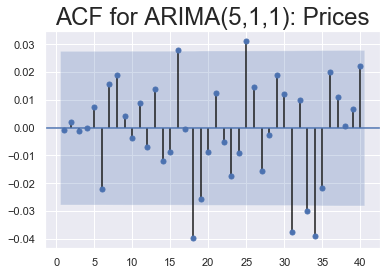

In [22]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1.iloc[1:], lags = 40, zero =False)
plt.title("ACF for ARIMA(5,1,1): Prices", size = 24)
plt.show()

### From the above ACF plot we can see that there exist no significant values in the first 15 lags; Although there still are some significant lags, but we need not consider them as the futher back in time we go the less relevant the data becomes.

## Higher Integeration Models

In [23]:
df['delta_prices'] = df.market_value.diff(1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
model_ar_1_i_0_ma_1 = ARIMA(df.delta_prices[1:], order = (1,0,1))
results_ar_1_i_0_ma_1 = model_ar_1_i_0_ma_1.fit()
results_ar_1_i_0_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Wed, 29 Apr 2020   AIC                          55215.333
Time:                        21:36:47   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

## Augmented Dickey - Fuller Test to test for Stationarity

In [25]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570747,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

### From the above Augmented Dickey Fiuller Test we can conclude that the df.delta_prices i.e. manually integrated time series is from a Stationary Process and hence we do not require a higher degree of Integration i.e.(d = 1)

# --

# The ARIMAX Model

In [26]:
raw_csv_data =raw_csv_data.fillna(method = 'ffill')

In [27]:
df['spx'] = raw_csv_data['spx'].iloc[:size].to_numpy()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog =df.spx , order = (1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.561
Method:                       css-mle   S.D. of innovations             59.132
Date:                Wed, 29 Apr 2020   AIC                          55217.122
Time:                        21:36:50   BIC                          55249.728
Sample:                    01-10-1994   HQIC                         55228.547
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5626      2.651     -0.212      0.832      -5.758       4.633
spx                      0.0010      0.002      0.442      0.659      -0.004       0.006
ar.L1.D.market_value     0.7461      0.070     10.607      0.000       0.608       0.884
ma.L1.D.market_value    -0.7922      0.064    -12.315      0.000      -0.918      -0.666
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3402           +0.0000j            1.3402            0.0000
MA.1            1.2623           +0.0000j            1.2623            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX(1,0,1)(2,0,1,5)

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx,order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -27485.251
Date:                           Wed, 29 Apr 2020   AIC                          54984.502
Time:                                   23:06:38   BIC                          55030.152
Sample:                               01-07-1994   HQIC                         55000.499
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            1.0956      0.035     31.139      0.000       1.027       1.165
ar.L1          0.9999      0.000   2713.076      0.000       0.999       1.001
ma.L1         -0.1038      0.007    -14.691      0.000      -0.118      -0.090
ar.S.L5        0.9666      0.011     86.900      0.000       0.945       0.988
ar.S.L10       0.0332      0.008      4.388      0.000       0.018       0.048
ma.S.L5       -0.9994      0.010    -96.427      0.000      -1.020      -0.979
sigma2      3312.2402     39.047     84.827      0.000    3235.710    3388.771
===================================================================================
Ljung-Box (Q):                      193.44   Jarque-Bera (JB):              6468.82
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""